# ***Setting up the Envoirment***

In [2]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [64]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import confusion_matrix

# Fetching Dataset

In [8]:
 # fetching the DataSet
mnist = fetch_openml('mnist_784')

In [12]:
 # Making X and Y from data for Model
x, y = mnist['data'], mnist['target']

In [13]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [16]:
x.shape

(70000, 784)

In [17]:
y.shape

(70000,)

In [33]:
# ploting for better visiuals
some_digit = x.iloc[36005]
some_digit_image = some_digit.values.reshape(28, 28) #reshaping it

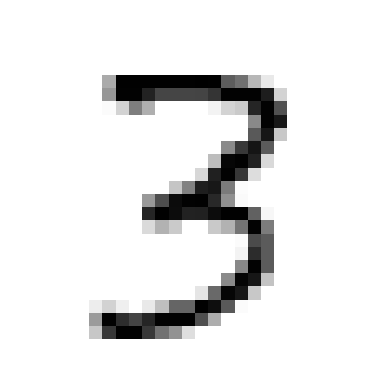

In [34]:
plt.imshow(some_digit_image, cmap="binary", interpolation='nearest')
plt.axis('off')
plt.show()

In [37]:
y.iloc[36005]

'3'

In [38]:
x_train , x_test = x[:60000] , x[60000:]
y_train , y_test = y[:60000] , y[60000:]

In [40]:
shuffle_index = np.random.permutation(60000)
x_train , y_train = x_train.iloc[shuffle_index] , y_train.iloc[shuffle_index]

# Creating a 2 dectector

In [52]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [53]:
y_train_2

,class
41015,False
45968,False
45837,False
25259,False
30289,False
...,...
39246,False
1967,False
46075,False
15559,False


In [54]:
y_test_2

,class
60000,False
60001,True
60002,False
60003,False
60004,False
...,...
69995,True
69996,False
69997,False
69998,False


In [68]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')

In [69]:
clf.fit(x_train , y_train_2)

LogisticRegression(tol=0.1)

In [70]:
clf.predict(some_digit.values.reshape(1, -1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [71]:
score = cross_val_score(clf , x_train , y_train_2 , cv = 3 , scoring = 'accuracy')

In [72]:
score.mean()

np.float64(0.97905)